# TFM

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import toml
import random
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score, 
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

## Ejecución de código en GPU

In [2]:
import tensorflow as tf

# Comprobar la versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Listar todos los dispositivos físicos disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):")
    for gpu in physical_devices:
        print(f'\t{gpu}')
else:
    print("🔴 No se ha detectado ninguna GPU. TensorFlow está utilizando la CPU.")

TensorFlow version: 2.10.0
🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):
	PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Lectura de fichero

In [3]:
data_dict = {}
DATA_DIR = '../../data/'

for data_folder in os.listdir(DATA_DIR):
    *data_files, config_file = os.listdir(f'{DATA_DIR}/{data_folder}')

    leak_value = toml.load(f'{DATA_DIR}/{data_folder}/{config_file}')['tanks']['flow_value']

    train_dataframe, test_data = random.sample(data_files, 2)

    data_dict[data_folder] = {
        'leak_value': leak_value,
        'train_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{train_dataframe}').drop(columns=['Unnamed: 0']),
        'test_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{test_data}').drop(columns=['Unnamed: 0'])
    }

### Conjuntos de datos de entrenamiento

In [4]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14217,87",-6025,"8078,98","16271,85","16202,83","-69,02","29,76",0
1,2,"16202,83",-5915,"7993,5","18281,33","18287,13","5,8","103,63",0
2,3,"18287,13",-6005,"5997,67","18279,8","18294,11","14,31","27,16",0
3,4,"18294,11",-6085,"3013,11","15222,22","15202,29","-19,93","93,76",0
4,5,"15202,29",-5800,"7941,86","17344,15","17431,85","87,7","159,23",0
...,...,...,...,...,...,...,...,...,...
995,996,"15406,65",-6030,"4978,48","14355,13","14337,52","-17,61","61,26",1
996,997,"14337,52",-6000,"5721,51","14059,03","14009,35","-49,68","-44,29",1
997,998,"14009,35",-6275,"6313,19","14047,54","14181,99","134,45","161,32",1
998,999,"14181,99",-6150,"5914,01","13946,0","14007,4","61,4","181,88",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22430,06","-6075,0","5976,32","22331,38","22376,0","44,62","-116,83",0
1,2,"22376,0","-6065,0","3965,07","20276,07","20290,81","14,74","-45,27",0
2,3,"20290,81","-5775,0","6982,55","21498,36","21513,87","15,51","-60,91",0
3,4,"21513,87","-6035,0","6956,14","22435,01","22426,74","-8,27","5,59",0
4,5,"22426,74","-6030,0","6377,94","22774,68","22817,15","42,47","36,97",0
...,...,...,...,...,...,...,...,...,...
995,996,"2107,2","-5828,98","6463,64","2741,86","2620,44","-121,42","-167,54",1
996,997,"2620,44","-5955,0","6142,6","2808,04","2771,02","-37,02","-143,07",1
997,998,"2771,02","-5896,0","3108,82","-16,16","25,62","41,78","-150,11",1
998,999,"25,62","-5592,26","6421,37","854,73","896,61","41,88","-83,97",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"23654,87","-6005,0","4298,93","21948,8","21972,61","23,81","163,31",0
1,2,"21972,61","-6095,0","4622,96","20500,57","20617,61","117,04","322,76",0
2,3,"20617,61","-6175,0","9067,79","23510,4","23442,51","-67,89","221,84",0
3,4,"23442,51","-5990,0","3410,32","20862,83","20890,7","27,87","233,22",0
4,5,"20890,7","-5915,0","6810,38","21786,08","21803,84","17,76","215,53",0
...,...,...,...,...,...,...,...,...,...
995,996,"10,65","-0,0","0,0","10,65","30,77","20,12","26,54",1
996,997,"30,77","-0,0","0,0","30,77","0,47","-30,3","-3,4",1
997,998,"0,47","-0,0","0,0","0,47","4,08","3,61","0,87",1
998,999,"4,08","-0,0","0,0","4,08","1,82","-2,26","-3,71",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19850,01","-6190,0","3007,83","16667,84","16649,01","-18,83","101,86",0
1,2,"16649,01","-6075,0","7996,41","18570,42","18569,16","-1,26","38,55",0
2,3,"18569,16","-6040,0","7973,61","20502,77","20544,29","41,52","126,92",0
3,4,"20544,29","-6335,0","5734,95","19944,24","19952,92","8,68","69,48",0
4,5,"19952,92","-6275,0","6590,42","20268,34","20302,97","34,63","41,44",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,57","-0,0","0,0","1,57","3,03","1,46","2,57",1
996,997,"3,03","-0,0","0,0","3,03","1,28","-1,75","-6,25",1
997,998,"1,28","-0,0","0,0","1,28","16,88","15,6","5,54",1
998,999,"16,88","-0,0","0,0","16,88","2,92","-13,96","-7,19",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20535,61","-5940,0","8641,12","23236,73","23294,75","58,02","265,22",0
1,2,"23294,75","-6575,0","6455,26","23175,01","23296,05","121,04","387,15",0
2,3,"23296,05","-5630,0","6600,92","24266,97","24325,7","58,73","366,14",0
3,4,"24325,7","-6015,0","3190,31","21501,01","21523,46","22,45","375,09",0
4,5,"21523,46","-5695,0","7376,83","23205,29","23238,07","32,78","376,68",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,69","-0,0","0,0","3,69","23,8","20,11","18,39",1
996,997,"23,8","-0,0","0,0","23,8","15,45","-8,35","12,43",1
997,998,"15,45","-0,0","0,0","15,45","10,85","-4,6","-0,6",1
998,999,"10,85","-0,0","0,0","10,85","3,49","-7,36","-0,14",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19384,06","-5915,0","9008,46","22477,52","22494,68","17,16","121,49",0
1,2,"22494,68","-6015,0","5468,91","21948,59","21910,81","-37,78","-10,59",0
2,3,"21910,81","-5915,0","5418,82","21414,63","21472,04","57,41","69,22",0
3,4,"21472,04","-6185,0","7550,03","22837,07","22838,96","1,89","35,51",0
4,5,"22838,96","-6090,0","6176,32","22925,28","22818,89","-106,39","-68,93",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,6","-0,0","0,0","2,6","1,33","-1,27","-8,75",1
996,997,"1,33","-0,0","0,0","1,33","8,17","6,84","5,01",1
997,998,"8,17","-0,0","0,0","8,17","5,37","-2,8","-5,57",1
998,999,"5,37","-0,0","0,0","5,37","6,2","0,83","-7,11",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18314,68","-6260,0","8063,56","20118,24","20038,25","-79,99","513,51",0
1,2,"20038,25","-6220,0","7971,11","21789,36","21835,68","46,32","584,43",0
2,3,"21835,68","-6015,0","6930,57","22751,25","22777,51","26,26","444,01",0
3,4,"22777,51","-6350,0","7057,14","23484,65","23463,71","-20,94","418,39",0
4,5,"23463,71","-6020,0","3038,59","20482,3","20488,43","6,13","370,07",0
...,...,...,...,...,...,...,...,...,...
995,996,"8,72","-0,0","0,0","8,72","5,98","-2,74","-1,9",1
996,997,"5,98","-0,0","0,0","5,98","1,84","-4,14","-13,72",1
997,998,"1,84","-0,0","0,0","1,84","26,5","24,66","14,7",1
998,999,"26,5","-0,0","0,0","26,5","4,1","-22,4","0,14",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20243,13","-5965,0","7985,87","22264,0","22278,4","14,4","181,64",0
1,2,"22278,4","-6175,0","6863,82","22967,22","22984,84","17,62","158,55",0
2,3,"22984,84","-6185,0","6517,27","23317,11","23354,87","37,76","255,01",0
3,4,"23354,87","-5855,0","5209,27","22709,14","22651,18","-57,96","184,76",0
4,5,"22651,18","-5890,0","6124,91","22886,09","22981,27","95,18","194,59",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,77","-0,0","0,0","1,77","2,07","0,3","-2,85",1
996,997,"2,07","-0,0","0,0","2,07","10,87","8,8","-1,72",1
997,998,"10,87","-0,0","0,0","10,87","7,09","-3,78","-0,4",1
998,999,"7,09","-0,0","0,0","7,09","19,21","12,12","14,47",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19322,64","-6195,0","9878,01","23005,65","23077,84","72,19","307,23",0
1,2,"23077,84","-6235,0","5073,39","21916,23","21906,18","-10,05","387,94",0
2,3,"21906,18","-5785,0","6427,45","22548,63","22677,71","129,08","444,17",0
3,4,"22677,71","-5855,0","5779,43","22602,14","22594,65","-7,49","382,09",0
4,5,"22594,65","-5840,0","7826,3","24580,95","24608,16","27,21","419,31",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,66","-0,0","0,0","5,66","7,47","1,81","-0,91",1
996,997,"7,47","-0,0","0,0","7,47","6,8","-0,67","-2,24",1
997,998,"6,8","-0,0","0,0","6,8","13,35","6,55","10,75",1
998,999,"13,35","-0,0","0,0","13,35","6,79","-6,56","-12,13",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17175,65","-6040,0","11136,86","22272,51","22101,01","-171,5","117,87",0
1,2,"22101,01","-6095,0","7811,38","23817,39","23841,55","24,16","80,96",0
2,3,"23841,55","-5795,0","5900,6","23947,15","23854,38","-92,77","-48,54",0
3,4,"23854,38","-6225,0","5615,01","23244,39","23242,13","-2,26","-163,52",0
4,5,"23242,13","-6135,0","5285,63","22392,76","22344,19","-48,57","-203,4",0
...,...,...,...,...,...,...,...,...,...
995,996,"9,35","-0,0","0,0","9,35","4,28","-5,07","-4,11",1
996,997,"4,28","-0,0","0,0","4,28","30,52","26,24","27,38",1
997,998,"30,52","-0,0","0,0","30,52","0,69","-29,83","-3,62",1
998,999,"0,69","-0,0","0,0","0,69","17,12","16,43","10,75",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18831,51","-6090,0","9010,27","21751,78","21727,77","-24,01","508,18",0
1,2,"21727,77","-6140,0","6929,71","22517,48","22587,42","69,94","545,28",0
2,3,"22587,42","-5725,0","4063,87","20926,29","20857,51","-68,78","449,32",0
3,4,"20857,51","-5745,0","7781,23","22893,74","22875,13","-18,61","389,62",0
4,5,"22875,13","-6250,0","3912,99","20538,12","20614,24","76,12","355,02",0
...,...,...,...,...,...,...,...,...,...
995,996,"4,46","-0,0","0,0","4,46","14,41","9,95","12,69",1
996,997,"14,41","-0,0","0,0","14,41","9,76","-4,65","6,04",1
997,998,"9,76","-0,0","0,0","9,76","2,55","-7,21","-16,74",1
998,999,"2,55","-0,0","0,0","2,55","9,52","6,97","6,9",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14736,59","-6295,0","7061,03","15502,62","15459,79","-42,83","88,42",0
1,2,"15459,79","-6260,0","5970,18","15169,97","15193,08","23,11","120,97",0
2,3,"15193,08","-5900,0","5999,44","15292,52","15281,39","-11,13","89,96",0
3,4,"15281,39","-5980,0","6939,21","16240,6","16288,43","47,83","131,63",0
4,5,"16288,43","-6175,0","7029,8","17143,23","17115,65","-27,58","96,75",0
...,...,...,...,...,...,...,...,...,...
995,996,"15,82","-0,0","0,0","15,82","6,25","-9,57","-9,53",1
996,997,"6,25","-0,0","0,0","6,25","7,02","0,77","2,84",1
997,998,"7,02","-0,0","0,0","7,02","1,57","-5,45","-7,61",1
998,999,"1,57","-0,0","0,0","1,57","0,12","-1,45","-4,11",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16777,0","-6100,0","9895,09","20572,09","20589,64","17,55","-18,03",0
1,2,"20589,64","-6115,0","4955,9","19430,54","19468,61","38,07","-12,02",0
2,3,"19468,61","-5965,0","6946,41","20450,02","20512,05","62,03","14,91",0
3,4,"20512,05","-6245,0","2980,24","17247,29","17265,48","18,19","87,81",0
4,5,"17265,48","-6425,0","8878,71","19719,19","19875,47","156,28","275,63",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,33","-0,0","0,0","0,33","0,14","-0,19","-6,95",1
996,997,"0,14","-0,0","0,0","0,14","10,7","10,56","-1,35",1
997,998,"10,7","-0,0","0,0","10,7","11,2","0,5","4,17",1
998,999,"11,2","-0,0","0,0","11,2","11,98","0,78","-1,3",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22682,46","-5995,0","5831,75","22519,21","22535,33","16,12","459,1",0
1,2,"22535,33","-5975,0","3507,95","20068,28","20135,89","67,61","514,24",0
2,3,"20135,89","-6250,0","8020,71","21906,6","21854,08","-52,52","421,71",0
3,4,"21854,08","-5985,0","8129,34","23998,42","23900,39","-98,03","282,93",0
4,5,"23900,39","-6030,0","5690,89","23561,28","23581,5","20,22","287,66",0
...,...,...,...,...,...,...,...,...,...
995,996,"6,96","-0,0","0,0","6,96","3,42","-3,54","-0,25",1
996,997,"3,42","-0,0","0,0","3,42","18,91","15,49","16,44",1
997,998,"18,91","-0,0","0,0","18,91","16,72","-2,19","9,09",1
998,999,"16,72","-0,0","0,0","16,72","1,44","-15,28","-0,25",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22379,58","-5785,0","5690,39","22284,97","22319,5","34,53","144,59",0
1,2,"22319,5","-5980,0","6499,32","22838,82","22799,39","-39,43","171,58",0
2,3,"22799,39","-6000,0","6305,86","23105,25","23145,46","40,21","213,48",0
3,4,"23145,46","-6095,0","5814,71","22865,17","22845,93","-19,24","195,21",0
4,5,"22845,93","-6145,0","6270,76","22971,69","22978,1","6,41","290,05",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,71","-0,0","0,0","2,71","2,61","-0,1","-0,48",1
996,997,"2,61","-0,0","0,0","2,61","5,93","3,32","1,85",1
997,998,"5,93","-0,0","0,0","5,93","13,8","7,87","5,27",1
998,999,"13,8","-0,0","0,0","13,8","6,1","-7,7","-0,73",1


### Conjunto de datos de prueba

In [5]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21950,34",-6035,"7006,85","22922,19","22962,99","40,8","172,2",0
1,2,"22962,99",-6105,"6515,76","23373,75","23300,26","-73,49","125,79",0
2,3,"23300,26",-5770,"6438,69","23968,95","24020,7","51,75","97,38",0
3,4,"24020,7",-5915,"5427,88","23533,58","23536,74","3,16","79,51",0
4,5,"23536,74",-6415,"4351,1","21472,84","21473,49","0,65","87,66",0
...,...,...,...,...,...,...,...,...,...
995,996,"15927,66",-6095,"6450,17","16282,83","16239,24","-43,59","114,14",1
996,997,"16239,24",-5855,"6019,11","16403,35","16385,84","-17,51","38,4",1
997,998,"16385,84",-6120,"3750,83","14016,67","13979,49","-37,18","-21,93",1
998,999,"13979,49",-5845,"6725,82","14860,31","14857,03","-3,28","10,77",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"12858,53","-6005,0","6028,71","12882,24","12839,43","-42,81","67,14",0
1,2,"12839,43","-5925,0","7060,68","13975,11","13920,05","-55,06","3,95",0
2,3,"13920,05","-6450,0","11910,17","19380,22","19446,63","66,41","-28,04",0
3,4,"19446,63","-6495,0","7059,14","20010,77","19951,08","-59,69","-92,41",0
4,5,"19951,08","-6300,0","7021,46","20672,54","20708,94","36,4","-130,33",0
...,...,...,...,...,...,...,...,...,...
995,996,"3854,5","-5960,0","5534,05","3428,55","3355,21","-73,34","-305,54",1
996,997,"3355,21","-6370,0","6329,75","3314,96","3330,31","15,35","-300,52",1
997,998,"3330,31","-5760,0","2905,72","476,03","483,45","7,42","-273,07",1
998,999,"483,45","-5412,11","8221,51","3292,85","3340,43","47,58","-195,76",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"10484,66","-5975,0","7217,79","11727,45","11882,71","155,26","381,21",0
1,2,"11882,71","-5850,0","7035,09","13067,8","13045,34","-22,46","344,85",0
2,3,"13045,34","-6140,0","3567,08","10472,42","10500,66","28,24","325,67",0
3,4,"10500,66","-6085,0","7441,43","11857,09","11819,52","-37,57","344,23",0
4,5,"11819,52","-6005,0","8124,72","13939,24","13815,32","-123,92","200,7",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,4","-0,0","0,0","3,4","2,76","-0,64","-20,06",1
996,997,"2,76","-0,0","0,0","2,76","9,57","6,81","-7,51",1
997,998,"9,57","-0,0","0,0","9,57","11,33","1,76","6,47",1
998,999,"11,33","-0,0","0,0","11,33","17,02","5,69","9,31",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21399,05","-5790,0","5638,02","21247,07","21227,09","-19,98","63,76",0
1,2,"21227,09","-5895,0","5241,74","20573,83","20576,89","3,06","133,61",0
2,3,"20576,89","-6055,0","6999,43","21521,32","21504,09","-17,23","33,97",0
3,4,"21504,09","-5995,0","9004,73","24513,82","24667,5","153,68","232,55",0
4,5,"24667,5","-6005,0","5447,75","24110,25","24146,71","36,46","202,77",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,62","-0,0","0,0","2,62","19,24","16,62","5,27",1
996,997,"19,24","-0,0","0,0","19,24","14,88","-4,36","5,99",1
997,998,"14,88","-0,0","0,0","14,88","9,37","-5,51","-4,99",1
998,999,"9,37","-0,0","0,0","9,37","3,89","-5,48","-11,62",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18449,36","-6030,0","6911,24","19330,6","19460,91","130,31","181,93",0
1,2,"19460,91","-6125,0","8022,82","21358,73","21278,01","-80,72","73,05",0
2,3,"21278,01","-6065,0","6947,29","22160,3","22222,18","61,88","147,32",0
3,4,"22222,18","-5980,0","7979,31","24221,49","24182,24","-39,25","-32,62",0
4,5,"24182,24","-6245,0","2862,55","20799,79","20848,11","48,32","85,87",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,66","-0,0","0,0","5,66","7,3","1,64","-9,82",1
996,997,"7,3","-0,0","0,0","7,3","10,34","3,04","-0,58",1
997,998,"10,34","-0,0","0,0","10,34","12,28","1,94","-5,24",1
998,999,"12,28","-0,0","0,0","12,28","8,88","-3,4","2,08",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15362,61","-6205,0","4348,17","13505,78","13436,24","-69,54","259,9",0
1,2,"13436,24","-6255,0","8032,58","15213,82","15174,65","-39,17","233,42",0
2,3,"15174,65","-6115,0","7934,11","16993,76","17045,24","51,48","300,07",0
3,4,"17045,24","-6230,0","5962,78","16778,02","16826,91","48,89","330,23",0
4,5,"16826,91","-6165,0","8008,51","18670,42","18664,17","-6,25","293,53",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,33","-0,0","0,0","1,33","4,68","3,35","0,91",1
996,997,"4,68","-0,0","0,0","4,68","17,74","13,06","9,68",1
997,998,"17,74","-0,0","0,0","17,74","6,13","-11,61","5,23",1
998,999,"6,13","-0,0","0,0","6,13","1,95","-4,18","-10,78",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16456,74","-6135,0","5716,3","16038,04","16047,94","9,9","143,08",0
1,2,"16047,94","-5965,0","6882,78","16965,72","17080,63","114,91","233,37",0
2,3,"17080,63","-6000,0","9101,26","20181,89","20160,53","-21,36","209,95",0
3,4,"20160,53","-5955,0","4950,57","19156,1","19147,89","-8,21","223,69",0
4,5,"19147,89","-6145,0","8216,24","21219,13","21270,33","51,2","321,6",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,46","-0,0","0,0","1,46","5,59","4,13","-8,62",1
996,997,"5,59","-0,0","0,0","5,59","21,53","15,94","16,29",1
997,998,"21,53","-0,0","0,0","21,53","11,16","-10,37","9,67",1
998,999,"11,16","-0,0","0,0","11,16","10,56","-0,6","-2,0",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22346,15","-6290,0","6198,63","22254,78","22228,05","-26,73","261,79",0
1,2,"22228,05","-6060,0","6145,31","22313,36","22365,14","51,78","219,45",0
2,3,"22365,14","-6010,0","6925,01","23280,15","23376,91","96,76","268,96",0
3,4,"23376,91","-6115,0","6575,39","23837,3","23908,35","71,05","380,65",0
4,5,"23908,35","-5990,0","5163,72","23082,07","23139,9","57,83","395,93",0
...,...,...,...,...,...,...,...,...,...
995,996,"14,34","-0,0","0,0","14,34","8,07","-6,27","-4,93",1
996,997,"8,07","-0,0","0,0","8,07","1,01","-7,06","-0,31",1
997,998,"1,01","-0,0","0,0","1,01","0,52","-0,49","-13,79",1
998,999,"0,52","-0,0","0,0","0,52","1,03","0,51","-5,26",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18375,49","-5955,0","8014,32","20434,81","20553,39","118,58","468,67",0
1,2,"20553,39","-5980,0","8130,08","22703,47","22791,19","87,72","570,59",0
2,3,"22791,19","-6035,0","6589,31","23345,5","23363,27","17,77","520,58",0
3,4,"23363,27","-6460,0","6100,17","23003,44","22912,6","-90,84","394,26",0
4,5,"22912,6","-5760,0","6362,96","23515,56","23550,02","34,46","358,38",0
...,...,...,...,...,...,...,...,...,...
995,996,"10,85","-0,0","0,0","10,85","3,87","-6,98","0,1",1
996,997,"3,87","-0,0","0,0","3,87","5,65","1,78","5,48",1
997,998,"5,65","-0,0","0,0","5,65","3,01","-2,64","0,29",1
998,999,"3,01","-0,0","0,0","3,01","4,98","1,97","1,79",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21923,75","-6020,0","7708,03","23611,78","23649,61","37,83","153,53",0
1,2,"23649,61","-6170,0","4031,77","21511,38","21528,85","17,47","132,34",0
2,3,"21528,85","-5715,0","5915,38","21729,23","21618,54","-110,69","18,97",0
3,4,"21618,54","-5945,0","7178,07","22851,61","22847,61","-4,0","-69,8",0
4,5,"22847,61","-5815,0","6070,18","23102,79","23046,27","-56,52","-88,54",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,69","-0,0","0,0","0,69","8,6","7,91","1,27",1
996,997,"8,6","-0,0","0,0","8,6","8,47","-0,13","7,4",1
997,998,"8,47","-0,0","0,0","8,47","1,56","-6,91","-9,34",1
998,999,"1,56","-0,0","0,0","1,56","9,73","8,17","-0,44",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21317,46","-5990,0","2968,12","18295,58","18323,64","28,06","-82,57",0
1,2,"18323,64","-6255,0","6219,19","18287,83","18284,2","-3,63","-120,57",0
2,3,"18284,2","-5830,0","5794,24","18248,44","18235,2","-13,24","18,69",0
3,4,"18235,2","-5855,0","6994,57","19374,77","19380,49","5,72","13,79",0
4,5,"19380,49","-6320,0","6978,26","20038,75","20051,59","12,84","35,39",0
...,...,...,...,...,...,...,...,...,...
995,996,"4,53","-0,0","0,0","4,53","4,38","-0,15","-0,18",1
996,997,"4,38","-0,0","0,0","4,38","21,36","16,98","10,55",1
997,998,"21,36","-0,0","0,0","21,36","15,47","-5,89","6,24",1
998,999,"15,47","-0,0","0,0","15,47","11,43","-4,04","11,26",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18248,42","-5890,0","7012,33","19370,75","19378,62","7,87","-61,1",0
1,2,"19378,62","-5950,0","6942,62","20371,24","20411,72","40,48","-16,9",0
2,3,"20411,72","-6070,0","6945,78","21287,5","21339,7","52,2","125,63",0
3,4,"21339,7","-5970,0","7011,03","22380,73","22385,01","4,28","200,94",0
4,5,"22385,01","-5705,0","5155,21","21835,22","21881,27","46,05","298,92",0
...,...,...,...,...,...,...,...,...,...
995,996,"12,16","-0,0","0,0","12,16","1,45","-10,71","-7,61",1
996,997,"1,45","-0,0","0,0","1,45","5,94","4,49","3,09",1
997,998,"5,94","-0,0","0,0","5,94","8,7","2,76","-1,52",1
998,999,"8,7","-0,0","0,0","8,7","4,53","-4,17","-1,27",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22465,51","-6080,0","7789,55","24175,06","24208,87","33,81","-175,32",0
1,2,"24208,87","-6045,0","4948,93","23112,8","23139,14","26,34","-178,39",0
2,3,"23139,14","-5935,0","7036,17","24240,31","24285,57","45,26","-129,43",0
3,4,"24285,57","-5950,0","4812,44","23148,01","23215,86","67,85","74,7",0
4,5,"23215,86","-6310,0","5513,33","22419,19","22370,85","-48,34","67,2",0
...,...,...,...,...,...,...,...,...,...
995,996,"13,88","-0,0","0,0","13,88","5,95","-7,93","1,78",1
996,997,"5,95","-0,0","0,0","5,95","12,1","6,15","10,02",1
997,998,"12,1","-0,0","0,0","12,1","5,06","-7,04","-9,98",1
998,999,"5,06","-0,0","0,0","5,06","4,17","-0,89","-3,22",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17698,38","-5710,0","4618,64","16607,02","16580,51","-26,51","35,66",0
1,2,"16580,51","-5875,0","6004,3","16709,81","16702,31","-7,5","58,61",0
2,3,"16702,31","-6250,0","8001,28","18453,59","18456,14","2,55","-9,07",0
3,4,"18456,14","-5870,0","6931,83","19517,97","19595,08","77,11","-16,24",0
4,5,"19595,08","-6330,0","7449,42","20714,5","20644,03","-70,47","-108,89",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,11","-0,0","0,0","1,11","1,53","0,42","-12,95",1
996,997,"1,53","-0,0","0,0","1,53","5,18","3,65","0,97",1
997,998,"5,18","-0,0","0,0","5,18","9,61","4,43","9,4",1
998,999,"9,61","-0,0","0,0","9,61","13,39","3,78","3,06",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"11373,11","-5975,0","6995,25","12393,36","12436,56","43,2","4,09",0
1,2,"12436,56","-6120,0","7067,55","13384,11","13284,95","-99,16","-89,11",0
2,3,"13284,95","-5925,0","7087,68","14447,63","14371,67","-75,96","-172,46",0
3,4,"14371,67","-5840,0","11960,98","20492,65","20550,77","58,12","-132,89",0
4,5,"20550,77","-6070,0","7059,92","21540,69","21530,27","-10,42","-122,12",0
...,...,...,...,...,...,...,...,...,...
995,996,"11,82","-0,0","0,0","11,82","11,43","-0,39","-5,83",1
996,997,"11,43","-0,0","0,0","11,43","13,08","1,65","10,37",1
997,998,"13,08","-0,0","0,0","13,08","1,18","-11,9","-5,79",1
998,999,"1,18","-0,0","0,0","1,18","20,33","19,15","11,23",1


## Limpieza de datos

In [6]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        for field in bad_formatted_fields:
            data_dict[case][dataset][field] = data_dict[case][dataset][field].str.replace(',', '.')
            data_dict[case][dataset][field] = pd.to_numeric(data_dict[case][dataset][field])

### Conjunto de datos de entrenamiento

In [7]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14217.87,-6025,8078.98,16271.85,16202.83,-69.02,29.76,0
1,2,16202.83,-5915,7993.50,18281.33,18287.13,5.80,103.63,0
2,3,18287.13,-6005,5997.67,18279.80,18294.11,14.31,27.16,0
3,4,18294.11,-6085,3013.11,15222.22,15202.29,-19.93,93.76,0
4,5,15202.29,-5800,7941.86,17344.15,17431.85,87.70,159.23,0
...,...,...,...,...,...,...,...,...,...
995,996,15406.65,-6030,4978.48,14355.13,14337.52,-17.61,61.26,1
996,997,14337.52,-6000,5721.51,14059.03,14009.35,-49.68,-44.29,1
997,998,14009.35,-6275,6313.19,14047.54,14181.99,134.45,161.32,1
998,999,14181.99,-6150,5914.01,13946.00,14007.40,61.40,181.88,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22430.06,"-6075,0",5976.32,22331.38,22376.00,44.62,-116.83,0
1,2,22376.00,"-6065,0",3965.07,20276.07,20290.81,14.74,-45.27,0
2,3,20290.81,"-5775,0",6982.55,21498.36,21513.87,15.51,-60.91,0
3,4,21513.87,"-6035,0",6956.14,22435.01,22426.74,-8.27,5.59,0
4,5,22426.74,"-6030,0",6377.94,22774.68,22817.15,42.47,36.97,0
...,...,...,...,...,...,...,...,...,...
995,996,2107.20,"-5828,98",6463.64,2741.86,2620.44,-121.42,-167.54,1
996,997,2620.44,"-5955,0",6142.60,2808.04,2771.02,-37.02,-143.07,1
997,998,2771.02,"-5896,0",3108.82,-16.16,25.62,41.78,-150.11,1
998,999,25.62,"-5592,26",6421.37,854.73,896.61,41.88,-83.97,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,23654.87,"-6005,0",4298.93,21948.80,21972.61,23.81,163.31,0
1,2,21972.61,"-6095,0",4622.96,20500.57,20617.61,117.04,322.76,0
2,3,20617.61,"-6175,0",9067.79,23510.40,23442.51,-67.89,221.84,0
3,4,23442.51,"-5990,0",3410.32,20862.83,20890.70,27.87,233.22,0
4,5,20890.70,"-5915,0",6810.38,21786.08,21803.84,17.76,215.53,0
...,...,...,...,...,...,...,...,...,...
995,996,10.65,"-0,0",0.00,10.65,30.77,20.12,26.54,1
996,997,30.77,"-0,0",0.00,30.77,0.47,-30.30,-3.40,1
997,998,0.47,"-0,0",0.00,0.47,4.08,3.61,0.87,1
998,999,4.08,"-0,0",0.00,4.08,1.82,-2.26,-3.71,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19850.01,"-6190,0",3007.83,16667.84,16649.01,-18.83,101.86,0
1,2,16649.01,"-6075,0",7996.41,18570.42,18569.16,-1.26,38.55,0
2,3,18569.16,"-6040,0",7973.61,20502.77,20544.29,41.52,126.92,0
3,4,20544.29,"-6335,0",5734.95,19944.24,19952.92,8.68,69.48,0
4,5,19952.92,"-6275,0",6590.42,20268.34,20302.97,34.63,41.44,0
...,...,...,...,...,...,...,...,...,...
995,996,1.57,"-0,0",0.00,1.57,3.03,1.46,2.57,1
996,997,3.03,"-0,0",0.00,3.03,1.28,-1.75,-6.25,1
997,998,1.28,"-0,0",0.00,1.28,16.88,15.60,5.54,1
998,999,16.88,"-0,0",0.00,16.88,2.92,-13.96,-7.19,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20535.61,"-5940,0",8641.12,23236.73,23294.75,58.02,265.22,0
1,2,23294.75,"-6575,0",6455.26,23175.01,23296.05,121.04,387.15,0
2,3,23296.05,"-5630,0",6600.92,24266.97,24325.70,58.73,366.14,0
3,4,24325.70,"-6015,0",3190.31,21501.01,21523.46,22.45,375.09,0
4,5,21523.46,"-5695,0",7376.83,23205.29,23238.07,32.78,376.68,0
...,...,...,...,...,...,...,...,...,...
995,996,3.69,"-0,0",0.00,3.69,23.80,20.11,18.39,1
996,997,23.80,"-0,0",0.00,23.80,15.45,-8.35,12.43,1
997,998,15.45,"-0,0",0.00,15.45,10.85,-4.60,-0.60,1
998,999,10.85,"-0,0",0.00,10.85,3.49,-7.36,-0.14,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19384.06,"-5915,0",9008.46,22477.52,22494.68,17.16,121.49,0
1,2,22494.68,"-6015,0",5468.91,21948.59,21910.81,-37.78,-10.59,0
2,3,21910.81,"-5915,0",5418.82,21414.63,21472.04,57.41,69.22,0
3,4,21472.04,"-6185,0",7550.03,22837.07,22838.96,1.89,35.51,0
4,5,22838.96,"-6090,0",6176.32,22925.28,22818.89,-106.39,-68.93,0
...,...,...,...,...,...,...,...,...,...
995,996,2.60,"-0,0",0.00,2.60,1.33,-1.27,-8.75,1
996,997,1.33,"-0,0",0.00,1.33,8.17,6.84,5.01,1
997,998,8.17,"-0,0",0.00,8.17,5.37,-2.80,-5.57,1
998,999,5.37,"-0,0",0.00,5.37,6.20,0.83,-7.11,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18314.68,"-6260,0",8063.56,20118.24,20038.25,-79.99,513.51,0
1,2,20038.25,"-6220,0",7971.11,21789.36,21835.68,46.32,584.43,0
2,3,21835.68,"-6015,0",6930.57,22751.25,22777.51,26.26,444.01,0
3,4,22777.51,"-6350,0",7057.14,23484.65,23463.71,-20.94,418.39,0
4,5,23463.71,"-6020,0",3038.59,20482.30,20488.43,6.13,370.07,0
...,...,...,...,...,...,...,...,...,...
995,996,8.72,"-0,0",0.00,8.72,5.98,-2.74,-1.90,1
996,997,5.98,"-0,0",0.00,5.98,1.84,-4.14,-13.72,1
997,998,1.84,"-0,0",0.00,1.84,26.50,24.66,14.70,1
998,999,26.50,"-0,0",0.00,26.50,4.10,-22.40,0.14,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20243.13,"-5965,0",7985.87,22264.00,22278.40,14.40,181.64,0
1,2,22278.40,"-6175,0",6863.82,22967.22,22984.84,17.62,158.55,0
2,3,22984.84,"-6185,0",6517.27,23317.11,23354.87,37.76,255.01,0
3,4,23354.87,"-5855,0",5209.27,22709.14,22651.18,-57.96,184.76,0
4,5,22651.18,"-5890,0",6124.91,22886.09,22981.27,95.18,194.59,0
...,...,...,...,...,...,...,...,...,...
995,996,1.77,"-0,0",0.00,1.77,2.07,0.30,-2.85,1
996,997,2.07,"-0,0",0.00,2.07,10.87,8.80,-1.72,1
997,998,10.87,"-0,0",0.00,10.87,7.09,-3.78,-0.40,1
998,999,7.09,"-0,0",0.00,7.09,19.21,12.12,14.47,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19322.64,"-6195,0",9878.01,23005.65,23077.84,72.19,307.23,0
1,2,23077.84,"-6235,0",5073.39,21916.23,21906.18,-10.05,387.94,0
2,3,21906.18,"-5785,0",6427.45,22548.63,22677.71,129.08,444.17,0
3,4,22677.71,"-5855,0",5779.43,22602.14,22594.65,-7.49,382.09,0
4,5,22594.65,"-5840,0",7826.30,24580.95,24608.16,27.21,419.31,0
...,...,...,...,...,...,...,...,...,...
995,996,5.66,"-0,0",0.00,5.66,7.47,1.81,-0.91,1
996,997,7.47,"-0,0",0.00,7.47,6.80,-0.67,-2.24,1
997,998,6.80,"-0,0",0.00,6.80,13.35,6.55,10.75,1
998,999,13.35,"-0,0",0.00,13.35,6.79,-6.56,-12.13,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17175.65,"-6040,0",11136.86,22272.51,22101.01,-171.50,117.87,0
1,2,22101.01,"-6095,0",7811.38,23817.39,23841.55,24.16,80.96,0
2,3,23841.55,"-5795,0",5900.60,23947.15,23854.38,-92.77,-48.54,0
3,4,23854.38,"-6225,0",5615.01,23244.39,23242.13,-2.26,-163.52,0
4,5,23242.13,"-6135,0",5285.63,22392.76,22344.19,-48.57,-203.40,0
...,...,...,...,...,...,...,...,...,...
995,996,9.35,"-0,0",0.00,9.35,4.28,-5.07,-4.11,1
996,997,4.28,"-0,0",0.00,4.28,30.52,26.24,27.38,1
997,998,30.52,"-0,0",0.00,30.52,0.69,-29.83,-3.62,1
998,999,0.69,"-0,0",0.00,0.69,17.12,16.43,10.75,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18831.51,"-6090,0",9010.27,21751.78,21727.77,-24.01,508.18,0
1,2,21727.77,"-6140,0",6929.71,22517.48,22587.42,69.94,545.28,0
2,3,22587.42,"-5725,0",4063.87,20926.29,20857.51,-68.78,449.32,0
3,4,20857.51,"-5745,0",7781.23,22893.74,22875.13,-18.61,389.62,0
4,5,22875.13,"-6250,0",3912.99,20538.12,20614.24,76.12,355.02,0
...,...,...,...,...,...,...,...,...,...
995,996,4.46,"-0,0",0.00,4.46,14.41,9.95,12.69,1
996,997,14.41,"-0,0",0.00,14.41,9.76,-4.65,6.04,1
997,998,9.76,"-0,0",0.00,9.76,2.55,-7.21,-16.74,1
998,999,2.55,"-0,0",0.00,2.55,9.52,6.97,6.90,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14736.59,"-6295,0",7061.03,15502.62,15459.79,-42.83,88.42,0
1,2,15459.79,"-6260,0",5970.18,15169.97,15193.08,23.11,120.97,0
2,3,15193.08,"-5900,0",5999.44,15292.52,15281.39,-11.13,89.96,0
3,4,15281.39,"-5980,0",6939.21,16240.60,16288.43,47.83,131.63,0
4,5,16288.43,"-6175,0",7029.80,17143.23,17115.65,-27.58,96.75,0
...,...,...,...,...,...,...,...,...,...
995,996,15.82,"-0,0",0.00,15.82,6.25,-9.57,-9.53,1
996,997,6.25,"-0,0",0.00,6.25,7.02,0.77,2.84,1
997,998,7.02,"-0,0",0.00,7.02,1.57,-5.45,-7.61,1
998,999,1.57,"-0,0",0.00,1.57,0.12,-1.45,-4.11,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16777.00,"-6100,0",9895.09,20572.09,20589.64,17.55,-18.03,0
1,2,20589.64,"-6115,0",4955.90,19430.54,19468.61,38.07,-12.02,0
2,3,19468.61,"-5965,0",6946.41,20450.02,20512.05,62.03,14.91,0
3,4,20512.05,"-6245,0",2980.24,17247.29,17265.48,18.19,87.81,0
4,5,17265.48,"-6425,0",8878.71,19719.19,19875.47,156.28,275.63,0
...,...,...,...,...,...,...,...,...,...
995,996,0.33,"-0,0",0.00,0.33,0.14,-0.19,-6.95,1
996,997,0.14,"-0,0",0.00,0.14,10.70,10.56,-1.35,1
997,998,10.70,"-0,0",0.00,10.70,11.20,0.50,4.17,1
998,999,11.20,"-0,0",0.00,11.20,11.98,0.78,-1.30,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22682.46,"-5995,0",5831.75,22519.21,22535.33,16.12,459.10,0
1,2,22535.33,"-5975,0",3507.95,20068.28,20135.89,67.61,514.24,0
2,3,20135.89,"-6250,0",8020.71,21906.60,21854.08,-52.52,421.71,0
3,4,21854.08,"-5985,0",8129.34,23998.42,23900.39,-98.03,282.93,0
4,5,23900.39,"-6030,0",5690.89,23561.28,23581.50,20.22,287.66,0
...,...,...,...,...,...,...,...,...,...
995,996,6.96,"-0,0",0.00,6.96,3.42,-3.54,-0.25,1
996,997,3.42,"-0,0",0.00,3.42,18.91,15.49,16.44,1
997,998,18.91,"-0,0",0.00,18.91,16.72,-2.19,9.09,1
998,999,16.72,"-0,0",0.00,16.72,1.44,-15.28,-0.25,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22379.58,"-5785,0",5690.39,22284.97,22319.50,34.53,144.59,0
1,2,22319.50,"-5980,0",6499.32,22838.82,22799.39,-39.43,171.58,0
2,3,22799.39,"-6000,0",6305.86,23105.25,23145.46,40.21,213.48,0
3,4,23145.46,"-6095,0",5814.71,22865.17,22845.93,-19.24,195.21,0
4,5,22845.93,"-6145,0",6270.76,22971.69,22978.10,6.41,290.05,0
...,...,...,...,...,...,...,...,...,...
995,996,2.71,"-0,0",0.00,2.71,2.61,-0.10,-0.48,1
996,997,2.61,"-0,0",0.00,2.61,5.93,3.32,1.85,1
997,998,5.93,"-0,0",0.00,5.93,13.80,7.87,5.27,1
998,999,13.80,"-0,0",0.00,13.80,6.10,-7.70,-0.73,1


### Conjunto de datos de prueba

In [8]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21950.34,-6035,7006.85,22922.19,22962.99,40.80,172.20,0
1,2,22962.99,-6105,6515.76,23373.75,23300.26,-73.49,125.79,0
2,3,23300.26,-5770,6438.69,23968.95,24020.70,51.75,97.38,0
3,4,24020.70,-5915,5427.88,23533.58,23536.74,3.16,79.51,0
4,5,23536.74,-6415,4351.10,21472.84,21473.49,0.65,87.66,0
...,...,...,...,...,...,...,...,...,...
995,996,15927.66,-6095,6450.17,16282.83,16239.24,-43.59,114.14,1
996,997,16239.24,-5855,6019.11,16403.35,16385.84,-17.51,38.40,1
997,998,16385.84,-6120,3750.83,14016.67,13979.49,-37.18,-21.93,1
998,999,13979.49,-5845,6725.82,14860.31,14857.03,-3.28,10.77,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,12858.53,"-6005,0",6028.71,12882.24,12839.43,-42.81,67.14,0
1,2,12839.43,"-5925,0",7060.68,13975.11,13920.05,-55.06,3.95,0
2,3,13920.05,"-6450,0",11910.17,19380.22,19446.63,66.41,-28.04,0
3,4,19446.63,"-6495,0",7059.14,20010.77,19951.08,-59.69,-92.41,0
4,5,19951.08,"-6300,0",7021.46,20672.54,20708.94,36.40,-130.33,0
...,...,...,...,...,...,...,...,...,...
995,996,3854.50,"-5960,0",5534.05,3428.55,3355.21,-73.34,-305.54,1
996,997,3355.21,"-6370,0",6329.75,3314.96,3330.31,15.35,-300.52,1
997,998,3330.31,"-5760,0",2905.72,476.03,483.45,7.42,-273.07,1
998,999,483.45,"-5412,11",8221.51,3292.85,3340.43,47.58,-195.76,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,10484.66,"-5975,0",7217.79,11727.45,11882.71,155.26,381.21,0
1,2,11882.71,"-5850,0",7035.09,13067.80,13045.34,-22.46,344.85,0
2,3,13045.34,"-6140,0",3567.08,10472.42,10500.66,28.24,325.67,0
3,4,10500.66,"-6085,0",7441.43,11857.09,11819.52,-37.57,344.23,0
4,5,11819.52,"-6005,0",8124.72,13939.24,13815.32,-123.92,200.70,0
...,...,...,...,...,...,...,...,...,...
995,996,3.40,"-0,0",0.00,3.40,2.76,-0.64,-20.06,1
996,997,2.76,"-0,0",0.00,2.76,9.57,6.81,-7.51,1
997,998,9.57,"-0,0",0.00,9.57,11.33,1.76,6.47,1
998,999,11.33,"-0,0",0.00,11.33,17.02,5.69,9.31,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21399.05,"-5790,0",5638.02,21247.07,21227.09,-19.98,63.76,0
1,2,21227.09,"-5895,0",5241.74,20573.83,20576.89,3.06,133.61,0
2,3,20576.89,"-6055,0",6999.43,21521.32,21504.09,-17.23,33.97,0
3,4,21504.09,"-5995,0",9004.73,24513.82,24667.50,153.68,232.55,0
4,5,24667.50,"-6005,0",5447.75,24110.25,24146.71,36.46,202.77,0
...,...,...,...,...,...,...,...,...,...
995,996,2.62,"-0,0",0.00,2.62,19.24,16.62,5.27,1
996,997,19.24,"-0,0",0.00,19.24,14.88,-4.36,5.99,1
997,998,14.88,"-0,0",0.00,14.88,9.37,-5.51,-4.99,1
998,999,9.37,"-0,0",0.00,9.37,3.89,-5.48,-11.62,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18449.36,"-6030,0",6911.24,19330.60,19460.91,130.31,181.93,0
1,2,19460.91,"-6125,0",8022.82,21358.73,21278.01,-80.72,73.05,0
2,3,21278.01,"-6065,0",6947.29,22160.30,22222.18,61.88,147.32,0
3,4,22222.18,"-5980,0",7979.31,24221.49,24182.24,-39.25,-32.62,0
4,5,24182.24,"-6245,0",2862.55,20799.79,20848.11,48.32,85.87,0
...,...,...,...,...,...,...,...,...,...
995,996,5.66,"-0,0",0.00,5.66,7.30,1.64,-9.82,1
996,997,7.30,"-0,0",0.00,7.30,10.34,3.04,-0.58,1
997,998,10.34,"-0,0",0.00,10.34,12.28,1.94,-5.24,1
998,999,12.28,"-0,0",0.00,12.28,8.88,-3.40,2.08,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15362.61,"-6205,0",4348.17,13505.78,13436.24,-69.54,259.90,0
1,2,13436.24,"-6255,0",8032.58,15213.82,15174.65,-39.17,233.42,0
2,3,15174.65,"-6115,0",7934.11,16993.76,17045.24,51.48,300.07,0
3,4,17045.24,"-6230,0",5962.78,16778.02,16826.91,48.89,330.23,0
4,5,16826.91,"-6165,0",8008.51,18670.42,18664.17,-6.25,293.53,0
...,...,...,...,...,...,...,...,...,...
995,996,1.33,"-0,0",0.00,1.33,4.68,3.35,0.91,1
996,997,4.68,"-0,0",0.00,4.68,17.74,13.06,9.68,1
997,998,17.74,"-0,0",0.00,17.74,6.13,-11.61,5.23,1
998,999,6.13,"-0,0",0.00,6.13,1.95,-4.18,-10.78,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16456.74,"-6135,0",5716.30,16038.04,16047.94,9.90,143.08,0
1,2,16047.94,"-5965,0",6882.78,16965.72,17080.63,114.91,233.37,0
2,3,17080.63,"-6000,0",9101.26,20181.89,20160.53,-21.36,209.95,0
3,4,20160.53,"-5955,0",4950.57,19156.10,19147.89,-8.21,223.69,0
4,5,19147.89,"-6145,0",8216.24,21219.13,21270.33,51.20,321.60,0
...,...,...,...,...,...,...,...,...,...
995,996,1.46,"-0,0",0.00,1.46,5.59,4.13,-8.62,1
996,997,5.59,"-0,0",0.00,5.59,21.53,15.94,16.29,1
997,998,21.53,"-0,0",0.00,21.53,11.16,-10.37,9.67,1
998,999,11.16,"-0,0",0.00,11.16,10.56,-0.60,-2.00,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22346.15,"-6290,0",6198.63,22254.78,22228.05,-26.73,261.79,0
1,2,22228.05,"-6060,0",6145.31,22313.36,22365.14,51.78,219.45,0
2,3,22365.14,"-6010,0",6925.01,23280.15,23376.91,96.76,268.96,0
3,4,23376.91,"-6115,0",6575.39,23837.30,23908.35,71.05,380.65,0
4,5,23908.35,"-5990,0",5163.72,23082.07,23139.90,57.83,395.93,0
...,...,...,...,...,...,...,...,...,...
995,996,14.34,"-0,0",0.00,14.34,8.07,-6.27,-4.93,1
996,997,8.07,"-0,0",0.00,8.07,1.01,-7.06,-0.31,1
997,998,1.01,"-0,0",0.00,1.01,0.52,-0.49,-13.79,1
998,999,0.52,"-0,0",0.00,0.52,1.03,0.51,-5.26,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18375.49,"-5955,0",8014.32,20434.81,20553.39,118.58,468.67,0
1,2,20553.39,"-5980,0",8130.08,22703.47,22791.19,87.72,570.59,0
2,3,22791.19,"-6035,0",6589.31,23345.50,23363.27,17.77,520.58,0
3,4,23363.27,"-6460,0",6100.17,23003.44,22912.60,-90.84,394.26,0
4,5,22912.60,"-5760,0",6362.96,23515.56,23550.02,34.46,358.38,0
...,...,...,...,...,...,...,...,...,...
995,996,10.85,"-0,0",0.00,10.85,3.87,-6.98,0.10,1
996,997,3.87,"-0,0",0.00,3.87,5.65,1.78,5.48,1
997,998,5.65,"-0,0",0.00,5.65,3.01,-2.64,0.29,1
998,999,3.01,"-0,0",0.00,3.01,4.98,1.97,1.79,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21923.75,"-6020,0",7708.03,23611.78,23649.61,37.83,153.53,0
1,2,23649.61,"-6170,0",4031.77,21511.38,21528.85,17.47,132.34,0
2,3,21528.85,"-5715,0",5915.38,21729.23,21618.54,-110.69,18.97,0
3,4,21618.54,"-5945,0",7178.07,22851.61,22847.61,-4.00,-69.80,0
4,5,22847.61,"-5815,0",6070.18,23102.79,23046.27,-56.52,-88.54,0
...,...,...,...,...,...,...,...,...,...
995,996,0.69,"-0,0",0.00,0.69,8.60,7.91,1.27,1
996,997,8.60,"-0,0",0.00,8.60,8.47,-0.13,7.40,1
997,998,8.47,"-0,0",0.00,8.47,1.56,-6.91,-9.34,1
998,999,1.56,"-0,0",0.00,1.56,9.73,8.17,-0.44,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21317.46,"-5990,0",2968.12,18295.58,18323.64,28.06,-82.57,0
1,2,18323.64,"-6255,0",6219.19,18287.83,18284.20,-3.63,-120.57,0
2,3,18284.20,"-5830,0",5794.24,18248.44,18235.20,-13.24,18.69,0
3,4,18235.20,"-5855,0",6994.57,19374.77,19380.49,5.72,13.79,0
4,5,19380.49,"-6320,0",6978.26,20038.75,20051.59,12.84,35.39,0
...,...,...,...,...,...,...,...,...,...
995,996,4.53,"-0,0",0.00,4.53,4.38,-0.15,-0.18,1
996,997,4.38,"-0,0",0.00,4.38,21.36,16.98,10.55,1
997,998,21.36,"-0,0",0.00,21.36,15.47,-5.89,6.24,1
998,999,15.47,"-0,0",0.00,15.47,11.43,-4.04,11.26,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18248.42,"-5890,0",7012.33,19370.75,19378.62,7.87,-61.10,0
1,2,19378.62,"-5950,0",6942.62,20371.24,20411.72,40.48,-16.90,0
2,3,20411.72,"-6070,0",6945.78,21287.50,21339.70,52.20,125.63,0
3,4,21339.70,"-5970,0",7011.03,22380.73,22385.01,4.28,200.94,0
4,5,22385.01,"-5705,0",5155.21,21835.22,21881.27,46.05,298.92,0
...,...,...,...,...,...,...,...,...,...
995,996,12.16,"-0,0",0.00,12.16,1.45,-10.71,-7.61,1
996,997,1.45,"-0,0",0.00,1.45,5.94,4.49,3.09,1
997,998,5.94,"-0,0",0.00,5.94,8.70,2.76,-1.52,1
998,999,8.70,"-0,0",0.00,8.70,4.53,-4.17,-1.27,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22465.51,"-6080,0",7789.55,24175.06,24208.87,33.81,-175.32,0
1,2,24208.87,"-6045,0",4948.93,23112.80,23139.14,26.34,-178.39,0
2,3,23139.14,"-5935,0",7036.17,24240.31,24285.57,45.26,-129.43,0
3,4,24285.57,"-5950,0",4812.44,23148.01,23215.86,67.85,74.70,0
4,5,23215.86,"-6310,0",5513.33,22419.19,22370.85,-48.34,67.20,0
...,...,...,...,...,...,...,...,...,...
995,996,13.88,"-0,0",0.00,13.88,5.95,-7.93,1.78,1
996,997,5.95,"-0,0",0.00,5.95,12.10,6.15,10.02,1
997,998,12.10,"-0,0",0.00,12.10,5.06,-7.04,-9.98,1
998,999,5.06,"-0,0",0.00,5.06,4.17,-0.89,-3.22,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17698.38,"-5710,0",4618.64,16607.02,16580.51,-26.51,35.66,0
1,2,16580.51,"-5875,0",6004.30,16709.81,16702.31,-7.50,58.61,0
2,3,16702.31,"-6250,0",8001.28,18453.59,18456.14,2.55,-9.07,0
3,4,18456.14,"-5870,0",6931.83,19517.97,19595.08,77.11,-16.24,0
4,5,19595.08,"-6330,0",7449.42,20714.50,20644.03,-70.47,-108.89,0
...,...,...,...,...,...,...,...,...,...
995,996,1.11,"-0,0",0.00,1.11,1.53,0.42,-12.95,1
996,997,1.53,"-0,0",0.00,1.53,5.18,3.65,0.97,1
997,998,5.18,"-0,0",0.00,5.18,9.61,4.43,9.40,1
998,999,9.61,"-0,0",0.00,9.61,13.39,3.78,3.06,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,11373.11,"-5975,0",6995.25,12393.36,12436.56,43.20,4.09,0
1,2,12436.56,"-6120,0",7067.55,13384.11,13284.95,-99.16,-89.11,0
2,3,13284.95,"-5925,0",7087.68,14447.63,14371.67,-75.96,-172.46,0
3,4,14371.67,"-5840,0",11960.98,20492.65,20550.77,58.12,-132.89,0
4,5,20550.77,"-6070,0",7059.92,21540.69,21530.27,-10.42,-122.12,0
...,...,...,...,...,...,...,...,...,...
995,996,11.82,"-0,0",0.00,11.82,11.43,-0.39,-5.83,1
996,997,11.43,"-0,0",0.00,11.43,13.08,1.65,10.37,1
997,998,13.08,"-0,0",0.00,13.08,1.18,-11.90,-5.79,1
998,999,1.18,"-0,0",0.00,1.18,20.33,19.15,11.23,1


<!-- TODO -->

## Selección de características

In [9]:
for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        data_dict[case][dataset] = data_dict[case][dataset].filter(items=['Variacion', 'Fugando combustible'])

### Conjunto de datos de entrenamiento

In [10]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Variacion,Fugando combustible
0,-69.02,0
1,5.80,0
2,14.31,0
3,-19.93,0
4,87.70,0
...,...,...
995,-17.61,1
996,-49.68,1
997,134.45,1
998,61.40,1


,Variacion,Fugando combustible
0,44.62,0
1,14.74,0
2,15.51,0
3,-8.27,0
4,42.47,0
...,...,...
995,-121.42,1
996,-37.02,1
997,41.78,1
998,41.88,1


,Variacion,Fugando combustible
0,23.81,0
1,117.04,0
2,-67.89,0
3,27.87,0
4,17.76,0
...,...,...
995,20.12,1
996,-30.30,1
997,3.61,1
998,-2.26,1


,Variacion,Fugando combustible
0,-18.83,0
1,-1.26,0
2,41.52,0
3,8.68,0
4,34.63,0
...,...,...
995,1.46,1
996,-1.75,1
997,15.60,1
998,-13.96,1


,Variacion,Fugando combustible
0,58.02,0
1,121.04,0
2,58.73,0
3,22.45,0
4,32.78,0
...,...,...
995,20.11,1
996,-8.35,1
997,-4.60,1
998,-7.36,1


,Variacion,Fugando combustible
0,17.16,0
1,-37.78,0
2,57.41,0
3,1.89,0
4,-106.39,0
...,...,...
995,-1.27,1
996,6.84,1
997,-2.80,1
998,0.83,1


,Variacion,Fugando combustible
0,-79.99,0
1,46.32,0
2,26.26,0
3,-20.94,0
4,6.13,0
...,...,...
995,-2.74,1
996,-4.14,1
997,24.66,1
998,-22.40,1


,Variacion,Fugando combustible
0,14.40,0
1,17.62,0
2,37.76,0
3,-57.96,0
4,95.18,0
...,...,...
995,0.30,1
996,8.80,1
997,-3.78,1
998,12.12,1


,Variacion,Fugando combustible
0,72.19,0
1,-10.05,0
2,129.08,0
3,-7.49,0
4,27.21,0
...,...,...
995,1.81,1
996,-0.67,1
997,6.55,1
998,-6.56,1


,Variacion,Fugando combustible
0,-171.50,0
1,24.16,0
2,-92.77,0
3,-2.26,0
4,-48.57,0
...,...,...
995,-5.07,1
996,26.24,1
997,-29.83,1
998,16.43,1


,Variacion,Fugando combustible
0,-24.01,0
1,69.94,0
2,-68.78,0
3,-18.61,0
4,76.12,0
...,...,...
995,9.95,1
996,-4.65,1
997,-7.21,1
998,6.97,1


,Variacion,Fugando combustible
0,-42.83,0
1,23.11,0
2,-11.13,0
3,47.83,0
4,-27.58,0
...,...,...
995,-9.57,1
996,0.77,1
997,-5.45,1
998,-1.45,1


,Variacion,Fugando combustible
0,17.55,0
1,38.07,0
2,62.03,0
3,18.19,0
4,156.28,0
...,...,...
995,-0.19,1
996,10.56,1
997,0.50,1
998,0.78,1


,Variacion,Fugando combustible
0,16.12,0
1,67.61,0
2,-52.52,0
3,-98.03,0
4,20.22,0
...,...,...
995,-3.54,1
996,15.49,1
997,-2.19,1
998,-15.28,1


,Variacion,Fugando combustible
0,34.53,0
1,-39.43,0
2,40.21,0
3,-19.24,0
4,6.41,0
...,...,...
995,-0.10,1
996,3.32,1
997,7.87,1
998,-7.70,1


### Conjunto de datos de prueba

In [11]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Variacion,Fugando combustible
0,40.80,0
1,-73.49,0
2,51.75,0
3,3.16,0
4,0.65,0
...,...,...
995,-43.59,1
996,-17.51,1
997,-37.18,1
998,-3.28,1


,Variacion,Fugando combustible
0,-42.81,0
1,-55.06,0
2,66.41,0
3,-59.69,0
4,36.40,0
...,...,...
995,-73.34,1
996,15.35,1
997,7.42,1
998,47.58,1


,Variacion,Fugando combustible
0,155.26,0
1,-22.46,0
2,28.24,0
3,-37.57,0
4,-123.92,0
...,...,...
995,-0.64,1
996,6.81,1
997,1.76,1
998,5.69,1


,Variacion,Fugando combustible
0,-19.98,0
1,3.06,0
2,-17.23,0
3,153.68,0
4,36.46,0
...,...,...
995,16.62,1
996,-4.36,1
997,-5.51,1
998,-5.48,1


,Variacion,Fugando combustible
0,130.31,0
1,-80.72,0
2,61.88,0
3,-39.25,0
4,48.32,0
...,...,...
995,1.64,1
996,3.04,1
997,1.94,1
998,-3.40,1


,Variacion,Fugando combustible
0,-69.54,0
1,-39.17,0
2,51.48,0
3,48.89,0
4,-6.25,0
...,...,...
995,3.35,1
996,13.06,1
997,-11.61,1
998,-4.18,1


,Variacion,Fugando combustible
0,9.90,0
1,114.91,0
2,-21.36,0
3,-8.21,0
4,51.20,0
...,...,...
995,4.13,1
996,15.94,1
997,-10.37,1
998,-0.60,1


,Variacion,Fugando combustible
0,-26.73,0
1,51.78,0
2,96.76,0
3,71.05,0
4,57.83,0
...,...,...
995,-6.27,1
996,-7.06,1
997,-0.49,1
998,0.51,1


,Variacion,Fugando combustible
0,118.58,0
1,87.72,0
2,17.77,0
3,-90.84,0
4,34.46,0
...,...,...
995,-6.98,1
996,1.78,1
997,-2.64,1
998,1.97,1


,Variacion,Fugando combustible
0,37.83,0
1,17.47,0
2,-110.69,0
3,-4.00,0
4,-56.52,0
...,...,...
995,7.91,1
996,-0.13,1
997,-6.91,1
998,8.17,1


,Variacion,Fugando combustible
0,28.06,0
1,-3.63,0
2,-13.24,0
3,5.72,0
4,12.84,0
...,...,...
995,-0.15,1
996,16.98,1
997,-5.89,1
998,-4.04,1


,Variacion,Fugando combustible
0,7.87,0
1,40.48,0
2,52.20,0
3,4.28,0
4,46.05,0
...,...,...
995,-10.71,1
996,4.49,1
997,2.76,1
998,-4.17,1


,Variacion,Fugando combustible
0,33.81,0
1,26.34,0
2,45.26,0
3,67.85,0
4,-48.34,0
...,...,...
995,-7.93,1
996,6.15,1
997,-7.04,1
998,-0.89,1


,Variacion,Fugando combustible
0,-26.51,0
1,-7.50,0
2,2.55,0
3,77.11,0
4,-70.47,0
...,...,...
995,0.42,1
996,3.65,1
997,4.43,1
998,3.78,1


,Variacion,Fugando combustible
0,43.20,0
1,-99.16,0
2,-75.96,0
3,58.12,0
4,-10.42,0
...,...,...
995,-0.39,1
996,1.65,1
997,-11.90,1
998,19.15,1


<!-- TODO -->

## Unificación de conjunto de datos

In [12]:
complete_train_data = pd.concat([element['train_dataframe'] for element in data_dict.values()])

train_data = (
    complete_train_data.drop(columns='Fugando combustible'), 
    complete_train_data['Fugando combustible']
)

In [13]:
segmented_test_data = [
    (element['leak_value'], element['test_dataframe']) for element in data_dict.values()
]

test_data = [(
    'unknown',
    pd.concat([element['test_dataframe'] for element in data_dict.values()], ignore_index=True)
)]

### Visualización de distribución de clases

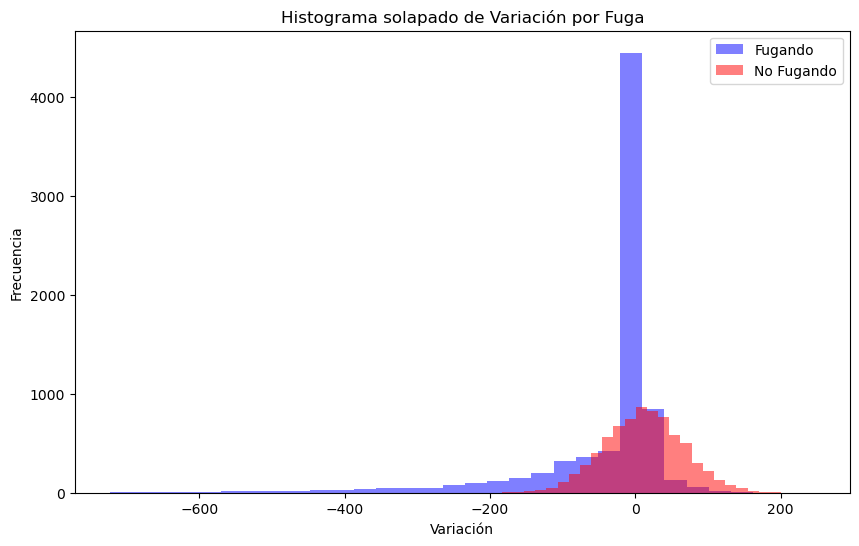

In [24]:
variacion_fuga_true = complete_train_data[complete_train_data['Fugando combustible'] == True]['Variacion']
variacion_fuga_false = complete_train_data[complete_train_data['Fugando combustible'] == False]['Variacion']

# Crear los histogramas solapados
plt.figure(figsize=(10, 6))

LAS_BINAS = 30

plt.hist(variacion_fuga_true, bins=LAS_BINAS, alpha=0.5, label='Fugando', color='blue')
plt.hist(variacion_fuga_false, bins=LAS_BINAS, alpha=0.5, label='No Fugando', color='red')

# Añadir título y etiquetas
plt.title('Histograma solapado de Variación por Fuga')
plt.xlabel('Variación')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

## Implementación de modelos

### Definición de métricas

In [14]:
def leak_detection_delay(y_true: np.array, y_pred: np.array) -> int:
    real_first_leak_day = 0
    while y_true[real_first_leak_day] != 1: real_first_leak_day += 1

    pred_first_leak_day = real_first_leak_day
    while y_pred[pred_first_leak_day] != 1: pred_first_leak_day += 1

    return (pred_first_leak_day - real_first_leak_day)

In [15]:
def performance_metrics(y_true, y_pred, leak_value = 0.013) -> dict:
    return {
        # Valor de referencia
            'leak_value': leak_value,
        # Metricas clasicas de ML
            'accuracy_score':   accuracy_score(y_true, y_pred),
            'f1_score':         f1_score(y_true, y_pred),
            'recall_score':     recall_score(y_true, y_pred),
            'precision_score':  precision_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred),
        # Metricas propias del problema
            'false_positives':  confusion_matrix(y_true, y_pred).ravel()[1],
            'leak_delay':       leak_detection_delay(y_true, y_pred),
            'leak_loss':        leak_detection_delay(y_true, y_pred) * leak_value * 60 * 24 if type(leak_value) != str else None
    }

### Modelos clásicos

In [16]:
from sklearn.model_selection import GridSearchCV
import pickle as pkl

param_grids_path = '../../pkl/param_grids'

def train_classic_model(classifier_class, param_grid, train_data, cv = 5):
    param_pkl_path = f'{param_grids_path}/{classifier_class.__name__}.pkl'
    classifier = None
    X_train, y_train = train_data
    if os.path.exists(param_pkl_path):  # Param grid already known
        param_grid = pkl.load(open(param_pkl_path, 'rb'))
        classifier = classifier_class(**param_grid)
        classifier.fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(
            estimator = classifier_class(),
            param_grid = param_grid,
            cv = cv
        )
        grid_search.fit(X_train, y_train)
        classifier = grid_search.best_estimator_
        pkl.dump(
            obj = grid_search.best_params_,
            file = open(param_pkl_path, 'wb')
        )
    return classifier

In [17]:
def test_classic_model(classifier, test_list) -> list[dict]:
    results = list()
    for (leak_value, test_data) in test_list:
        X_test = test_data.drop(columns='Fugando combustible')
        y_test = test_data['Fugando combustible']
        y_pred = classifier.predict(X_test)
        results.append(performance_metrics(y_test, y_pred, leak_value))
    return results

##### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = train_classic_model(RandomForestClassifier, rf_param_grid, train_data)

rf_seg_results = test_classic_model(rf_model, segmented_test_data)
rf_results = test_classic_model(rf_model, test_data)

##### Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb_model = train_classic_model(GaussianNB, gnb_param_grid, train_data)

gnb_seg_results = test_classic_model(gnb_model, segmented_test_data)
gnb_results = test_classic_model(gnb_model, test_data)

##### KNN Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = train_classic_model(KNeighborsClassifier, knn_param_grid, train_data)

knn_seg_results = test_classic_model(knn_model, segmented_test_data)
knn_results = test_classic_model(knn_model, test_data)

##### XGBoost Classifier

In [21]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = train_classic_model(XGBClassifier, xgb_param_grid, train_data)

xgb_seg_results = test_classic_model(xgb_model, segmented_test_data)
xgb_results = test_classic_model(xgb_model, test_data)

##### _Ensemble Classifier_

In [22]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(
    estimators=[
        # NOTE: Podría ponerle los hiperparámetros ideales 
        ('rf', RandomForestClassifier()),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ],
    voting='hard'
)

vot_model.fit(train_data[0], train_data[1])

vot_seg_results = test_classic_model(vot_model, segmented_test_data)
vot_results = test_classic_model(vot_model, test_data)

### Modelos _Deep Learning_

In [23]:
def test_dl_model(model, test_list):
    result_list = []
    for leak_value, test_dataframe in test_list:
        X_test = test_dataframe.drop(columns='Fugando combustible')
        y_test = test_dataframe['Fugando combustible']
        
        y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

        result_list.append(performance_metrics(y_test, y_pred, leak_value))

    return result_list

#### Único modelo de _Deep Learning_

In [24]:
X_train, y_train = train_data

##### Modelo unicapa

In [25]:
unil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(15, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

unil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = unil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_unil_seg_results = test_dl_model(unil_model, segmented_test_data)
dl_unil_results = test_dl_model(unil_model, test_data)

##### Modelo multicapa

In [26]:
multil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(25, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(40, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(60, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

multil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = multil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_multil_seg_results = test_dl_model(multil_model, segmented_test_data)
dl_multil_results = test_dl_model(multil_model, test_data)

#### Múltiples modelos de _Deep Learning_

In [27]:
dl_multim_seg_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = data_dict[case]['leak_value']

    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_seg_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

In [28]:
dl_multim_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = test_data[0][0]

    X_test = test_data[0][1].drop(columns='Fugando combustible')
    y_test = test_data[0][1]['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

#### Modelo _ensemble_ de mini\_modelos de _Deep Learning_

In [29]:
from scipy.stats import mode

class HomebrewEnsembleClassifier:
    def __init__(self, model_list) -> None:
        self.model_list = model_list
    
    def predict(self, X_input, verbose = 0) -> np.ndarray:
        prediction_list = [model.predict(X_input, verbose=verbose) for model in self.model_list]
        ensemble_predictions, _ = mode(prediction_list, axis=0)
        return ensemble_predictions.ravel()

In [30]:
from tensorflow.keras.models import load_model

pkl_model_dir = '../../pkl/models'

model_list = [load_model(f'{pkl_model_dir}/{filename}') for filename in os.listdir(pkl_model_dir)]

dl_vot_model = HomebrewEnsembleClassifier(model_list)

In [31]:
dl_vot_seg_results = test_dl_model(dl_vot_model, segmented_test_data)
dl_vot_results = test_dl_model(dl_vot_model, test_data)

## Visualización de resultados

### Tablas de resultados

In [35]:
def display_result_table(results, name) -> None:
    df_chikito = pd.DataFrame.from_records(results).drop(columns='confusion_matrix')

    display(pd.DataFrame.from_records(results).drop(columns='confusion_matrix'))

    df_chikito.columns = [column.replace('_', '\\_') for column in df_chikito.columns]

    df_chikito.to_latex(
        f'../../docs/latex/{name.replace(" ", "_")}_table.tex',
        index = False,
        float_format = '%.4f'
    )

#### _Random Forest Classifier_

In [36]:
display_result_table(rf_seg_results, 'Random Forest')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.526,0.413366,0.330693,0.551155,136,1,18.720000
1,0.054929,0.552,0.462830,0.382178,0.586626,136,2,158.194286
2,0.096857,0.634,0.605603,0.556436,0.664303,142,0,0.000000
3,0.138786,0.726,0.726547,0.720792,0.732394,133,0,0.000000
4,0.180714,0.762,0.768932,0.784158,0.754286,129,0,0.000000
5,0.222643,0.816,0.825758,0.863366,0.791289,115,0,0.000000
6,0.264571,0.810,0.823420,0.877228,0.775832,128,0,0.000000
7,0.306500,0.819,0.833180,0.895050,0.779310,128,0,0.000000
8,0.348429,0.813,0.824742,0.871287,0.782918,122,0,0.000000
9,0.390357,0.825,0.840764,0.914851,0.777778,132,0,0.000000


In [37]:
display_result_table(rf_results, 'Random Forest General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.758933,0.765894,0.780858,0.751493,1956,1,None


#### _Naive Bayes Classifier_

In [38]:
display_result_table(gnb_seg_results, 'Gaussian NB')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.522,0.309249,0.211881,0.572193,80,3,56.160000
1,0.054929,0.606,0.498728,0.388119,0.697509,85,3,237.291429
2,0.096857,0.601,0.482490,0.368317,0.699248,80,1,139.474286
3,0.138786,0.587,0.454425,0.340594,0.682540,80,0,0.000000
4,0.180714,0.573,0.414266,0.299010,0.674107,73,0,0.000000
5,0.222643,0.549,0.360284,0.251485,0.635000,73,0,0.000000
6,0.264571,0.534,0.328530,0.225743,0.603175,75,0,0.000000
7,0.306500,0.518,0.297376,0.201980,0.563536,79,0,0.000000
8,0.348429,0.504,0.291429,0.201980,0.523077,93,0,0.000000
9,0.390357,0.492,0.255132,0.172277,0.491525,90,0,0.000000


In [39]:
display_result_table(gnb_results, 'Gaussian NB General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.527267,0.324345,0.224686,0.582877,1218,3,None


#### _KNN Classifier_

In [40]:
display_result_table(knn_seg_results, 'KNN')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.529,0.420664,0.338614,0.555195,137,1,18.720000
1,0.054929,0.552,0.471698,0.396040,0.583090,143,6,474.582857
2,0.096857,0.636,0.612766,0.570297,0.662069,147,0,0.000000
3,0.138786,0.719,0.716448,0.702970,0.730453,131,0,0.000000
4,0.180714,0.746,0.751953,0.762376,0.741811,134,0,0.000000
5,0.222643,0.792,0.801905,0.833663,0.772477,124,0,0.000000
6,0.264571,0.792,0.805243,0.851485,0.763766,133,0,0.000000
7,0.306500,0.804,0.816479,0.863366,0.774423,127,0,0.000000
8,0.348429,0.802,0.812144,0.847525,0.779599,121,0,0.000000
9,0.390357,0.806,0.822669,0.891089,0.764007,139,0,0.000000


In [41]:
display_result_table(knn_results, 'KNN General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.745067,0.750912,0.760924,0.74116,2013,1,None


#### _XGBoost Classifier_

In [42]:
display_result_table(xgb_seg_results, 'XGBoost')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.529,0.426309,0.346535,0.553797,141,1,18.720000
1,0.054929,0.548,0.460621,0.382178,0.579580,140,2,158.194286
2,0.096857,0.636,0.609442,0.562376,0.665105,143,0,0.000000
3,0.138786,0.727,0.727817,0.722772,0.732932,133,0,0.000000
4,0.180714,0.775,0.785918,0.817822,0.756410,133,0,0.000000
5,0.222643,0.826,0.837687,0.889109,0.791887,118,0,0.000000
6,0.264571,0.810,0.826007,0.893069,0.768313,136,0,0.000000
7,0.306500,0.823,0.838356,0.908911,0.777966,131,0,0.000000
8,0.348429,0.831,0.843083,0.899010,0.793706,118,0,0.000000
9,0.390357,0.822,0.838475,0.914851,0.773869,135,0,0.000000


In [43]:
display_result_table(xgb_results, 'XGBoost General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.764667,0.773486,0.795644,0.752528,1982,1,None


#### _Ensemble Classifier_

In [44]:
display_result_table(vot_seg_results, 'Ensemble')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.527,0.380079,0.287129,0.562016,113,1,18.720000
1,0.054929,0.542,0.418782,0.326733,0.583039,118,6,474.582857
2,0.096857,0.626,0.567130,0.485149,0.682451,114,1,139.474286
3,0.138786,0.700,0.674620,0.615842,0.745803,106,0,0.000000
4,0.180714,0.734,0.725207,0.695050,0.758099,112,0,0.000000
5,0.222643,0.782,0.774793,0.742574,0.809935,88,0,0.000000
6,0.264571,0.772,0.770624,0.758416,0.783231,106,0,0.000000
7,0.306500,0.772,0.767821,0.746535,0.790356,100,0,0.000000
8,0.348429,0.762,0.755144,0.726733,0.785867,100,0,0.000000
9,0.390357,0.776,0.774194,0.760396,0.788501,103,0,0.000000


In [45]:
display_result_table(vot_results, 'Ensemble General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.7234,0.707302,0.661782,0.759545,1587,1,None


#### Modelo DL unicapa

In [46]:
display_result_table(dl_unil_seg_results, 'DL Unicapa')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.573,0.600561,0.635644,0.569149,243,1,18.720000
1,0.054929,0.636,0.689949,0.801980,0.605381,264,1,79.097143
2,0.096857,0.662,0.720661,0.863366,0.618440,269,0,0.000000
3,0.138786,0.702,0.756536,0.916832,0.643950,256,0,0.000000
4,0.180714,0.725,0.775510,0.940594,0.659722,245,0,0.000000
5,0.222643,0.733,0.780968,0.942574,0.666667,238,0,0.000000
6,0.264571,0.704,0.765823,0.958416,0.637681,275,0,0.000000
7,0.306500,0.722,0.775806,0.952475,0.654422,254,0,0.000000
8,0.348429,0.731,0.779327,0.940594,0.665266,239,0,0.000000
9,0.390357,0.728,0.781701,0.964356,0.657220,254,0,0.000000


In [47]:
display_result_table(dl_unil_results, 'DL Unicapa General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.700333,0.754197,0.910363,0.643764,3816,1,None


#### Modelo DL multicapa

In [48]:
display_result_table(dl_multil_seg_results, 'DL Multicapa')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.543,0.521466,0.493069,0.553333,201,1,18.720000
1,0.054929,0.553,0.563902,0.572277,0.555769,231,2,158.194286
2,0.096857,0.642,0.666667,0.708911,0.629174,211,0,0.000000
3,0.138786,0.699,0.734802,0.825743,0.661905,213,0,0.000000
4,0.180714,0.737,0.775789,0.900990,0.681138,213,0,0.000000
5,0.222643,0.771,0.803770,0.928713,0.708459,193,0,0.000000
6,0.264571,0.752,0.793677,0.944554,0.684362,220,0,0.000000
7,0.306500,0.770,0.807370,0.954455,0.699565,207,0,0.000000
8,0.348429,0.798,0.827939,0.962376,0.726457,183,0,0.000000
9,0.390357,0.785,0.819782,0.968317,0.710756,199,0,0.000000


In [49]:
display_result_table(dl_multil_results, 'DL Multicapa General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.7328,0.767975,0.875644,0.683885,3066,1,None


#### Modelo DL multiple

In [50]:
display_result_table(dl_multim_seg_results, 'DL Multimodelo')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.561,0.606983,0.671287,0.553922,273,1,18.720000
1,0.054929,0.655,0.647600,0.627723,0.668776,157,1,79.097143
2,0.096857,0.658,0.710169,0.829703,0.620741,256,0,0.000000
3,0.138786,0.686,0.728374,0.833663,0.646697,230,0,0.000000
4,0.180714,0.677,0.656017,0.609901,0.709677,126,105,27324.000000
5,0.222643,0.687,0.758674,0.974257,0.621212,300,0,0.000000
6,0.264571,0.686,0.735245,0.863366,0.640235,245,0,0.000000
7,0.306500,0.696,0.634615,0.522772,0.807339,63,101,44577.360000
8,0.348429,0.703,0.655052,0.558416,0.792135,74,0,0.000000
9,0.390357,0.692,0.735395,0.847525,0.649469,231,0,0.000000


In [51]:
display_result_table(dl_multim_results, 'DL Multimodelo General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.601000,0.608542,0.614125,0.603059,3062,1,None
1,unknown,0.591867,0.587577,0.575710,0.599945,2908,2,None
2,unknown,0.615933,0.631909,0.652805,0.612308,3131,1,None
3,unknown,0.636067,0.661583,0.704422,0.623656,3220,1,None
4,unknown,0.667667,0.705952,0.789967,0.638089,3394,1,None
5,unknown,0.505000,0.671096,1.000000,0.505000,7425,0,None
6,unknown,0.753267,0.744776,0.712871,0.779671,1526,1,None
7,unknown,0.636533,0.595068,0.528845,0.680251,1883,7,None
8,unknown,0.698000,0.749308,0.893729,0.645069,3725,1,None
9,unknown,0.638333,0.720778,0.924356,0.590687,4852,1,None


#### Modelo DL _ensemble_

In [52]:
display_result_table(dl_vot_seg_results, 'DL Ensemble')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.500,0.070632,0.037624,0.575758,14,10,187.200000
1,0.054929,0.488,0.051852,0.027723,0.400000,21,17,1344.651429
2,0.096857,0.520,0.151943,0.085149,0.704918,18,143,19944.822857
3,0.138786,0.531,0.181501,0.102970,0.764706,16,133,26580.240000
4,0.180714,0.531,0.181501,0.102970,0.764706,16,142,36952.457143
5,0.222643,0.545,0.208696,0.118812,0.857143,10,106,33984.205714
6,0.264571,0.558,0.263333,0.156436,0.831579,16,141,53718.582857
7,0.306500,0.556,0.247458,0.144554,0.858824,12,101,44577.360000
8,0.348429,0.560,0.261745,0.154455,0.857143,13,120,60208.457143
9,0.390357,0.552,0.255814,0.152475,0.793814,20,112,62956.800000


In [53]:
display_result_table(dl_vot_results, 'DL Ensemble General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.546867,0.229103,0.133333,0.813205,232,10,None


### Matrices de confusión

In [54]:
def display_conf_matrix(confusion_matrix, name):
    disp = ConfusionMatrixDisplay(
        confusion_matrix,
        display_labels=['No fuga', 'Fuga']
    ).plot(colorbar=False)

    plt.title(f'Resultados de {name}', fontsize=14)

    plt.xlabel('Etiqueta Predicha', fontsize=12)
    plt.ylabel('Etiqueta Verdadera', fontsize=12)

    for text in disp.text_.ravel():
        text.set_fontsize(11)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(
        f'../../docs/media/cm_{name.replace(" ", "_")}.eps',
        format='eps'    
    )

#### _Random Forest Classifier_

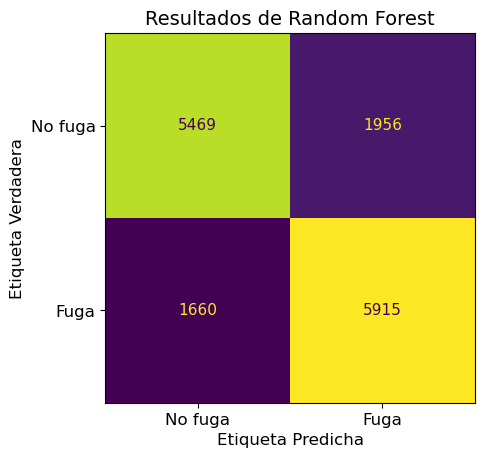

In [55]:
display_conf_matrix(rf_results[0]['confusion_matrix'], 'Random Forest')

#### _Gaussian NB Classifier_

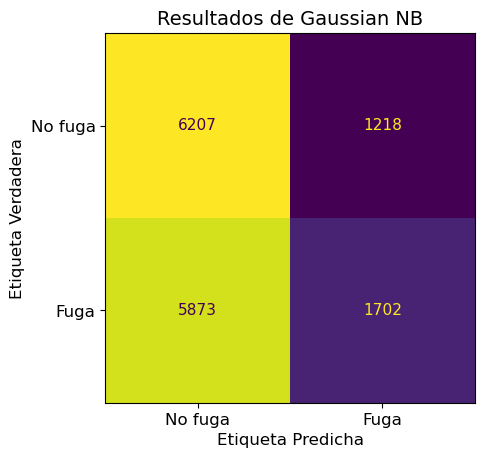

In [56]:
display_conf_matrix(gnb_results[0]['confusion_matrix'], 'Gaussian NB')

#### _KNN Classifier_

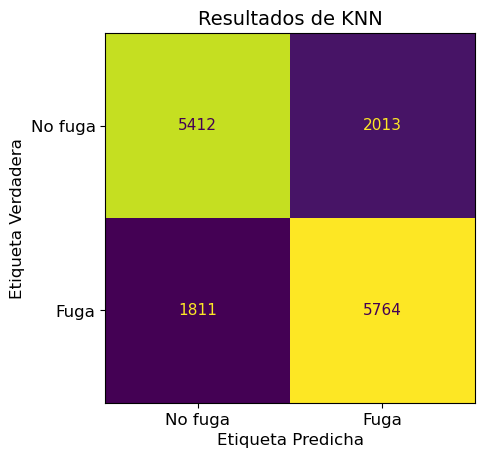

In [57]:
display_conf_matrix(knn_results[0]['confusion_matrix'], 'KNN')

#### _XGBoost Classifier_

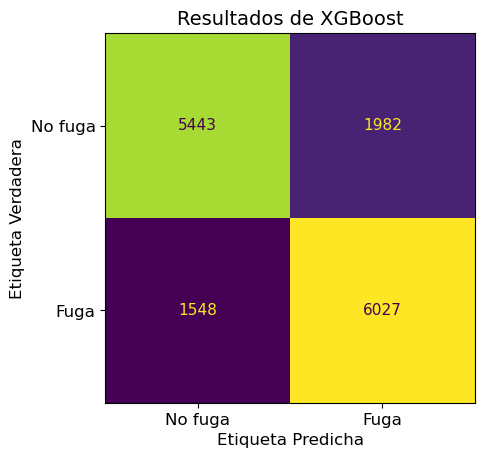

In [58]:
display_conf_matrix(xgb_results[0]['confusion_matrix'], 'XGBoost')

#### _Ensemble Classifier_

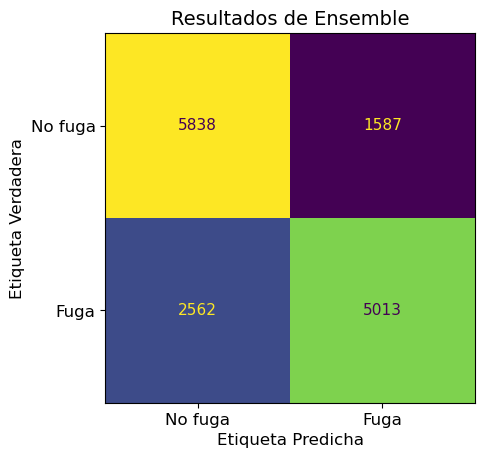

In [59]:
display_conf_matrix(vot_results[0]['confusion_matrix'], 'Ensemble')

#### Modelo DL unicapa

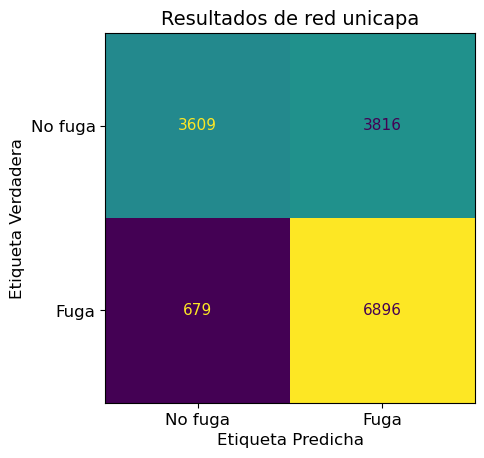

In [60]:
display_conf_matrix(dl_unil_results[0]['confusion_matrix'], 'red unicapa')

#### Modelo DL multicapa

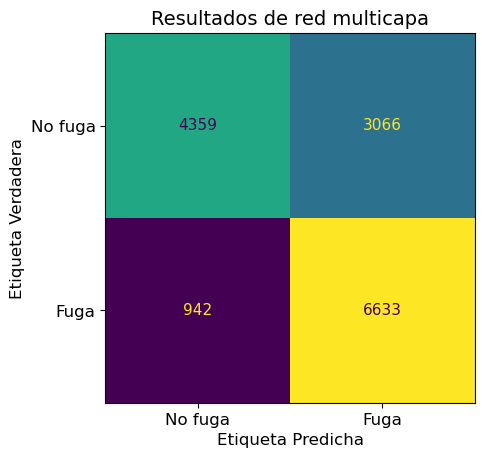

In [61]:
display_conf_matrix(dl_multil_results[0]['confusion_matrix'], 'red multicapa')

#### Modelo DL _ensemble_

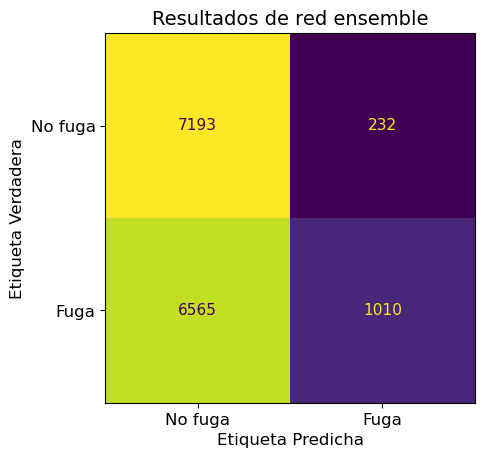

In [62]:
display_conf_matrix(dl_vot_results[0]['confusion_matrix'], 'red ensemble')

### Otros

In [63]:
display_seg_list = [
    ('Random Forest',   rf_seg_results),
    ('Gaussian NB',     gnb_seg_results),
    ('KNN',             knn_seg_results),
    ('XGBoost',         xgb_seg_results),
    ('Ensemble',        vot_seg_results),
    ('DL unilayer',     dl_unil_seg_results),
    ('DL multilayer',   dl_multil_seg_results),
    ('DL ensemble',     dl_vot_seg_results)
]

In [64]:
display_list = [
    ('Random Forest',   rf_results),
    ('Gaussian NB',     gnb_results),
    ('KNN',             knn_results),
    ('XGBoost',         xgb_results),
    ('Ensemble',        vot_results),
    ('DL unilayer',     dl_unil_results),
    ('DL multilayer',   dl_multil_results),
    ('DL ensemble',     dl_vot_results)
]

#### Comparativa de falsos positivos

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


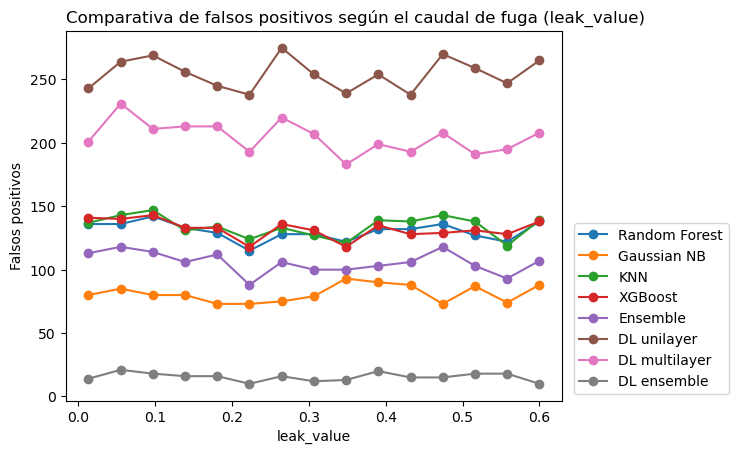

In [65]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['false_positives'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de falsos positivos según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Falsos positivos')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_falsos_positivos.eps', format='eps')

plt.show()

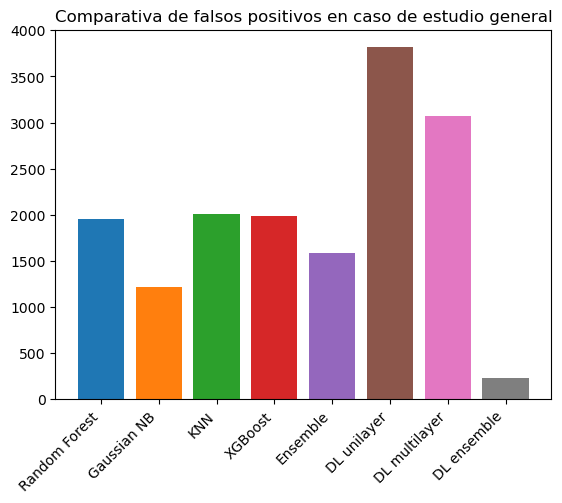

In [66]:
for (name, results) in display_list:
    plt.bar(name, results[0]['false_positives'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de falsos positivos en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_falsos_positivos_g.eps', format='eps')

plt.show()

#### Comparativa de sensibilidad (_recall_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


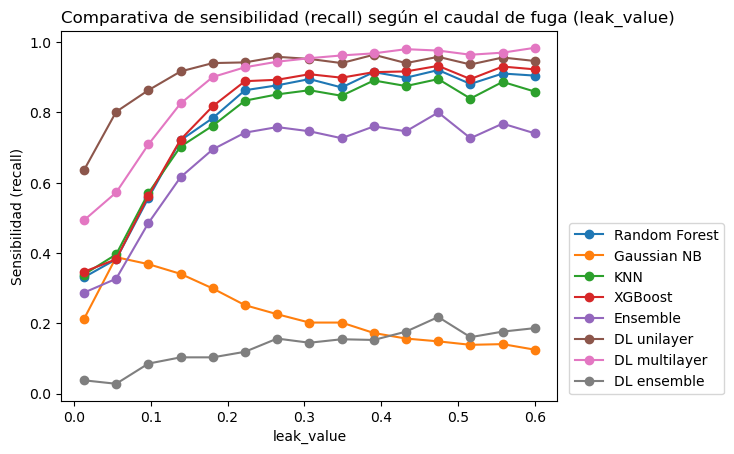

In [67]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['recall_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de sensibilidad (recall) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Sensibilidad (recall)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_recall.eps', format='eps')

plt.show()

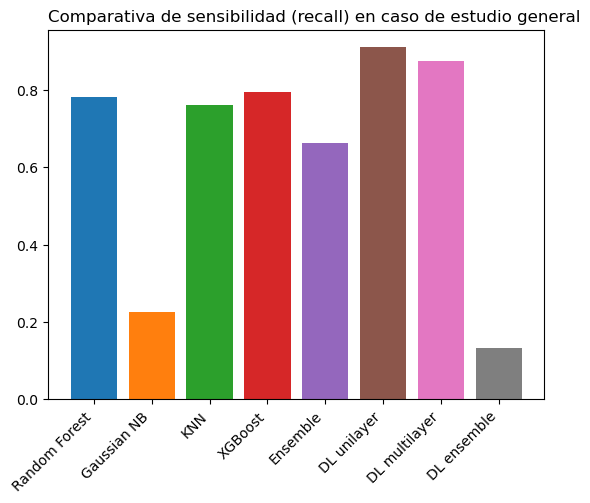

In [68]:
for (name, results) in display_list:
    plt.bar(name, results[0]['recall_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de sensibilidad (recall) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_recall_g.eps', format='eps')

plt.show()

#### Comparativa de exactitud (_accuracy_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


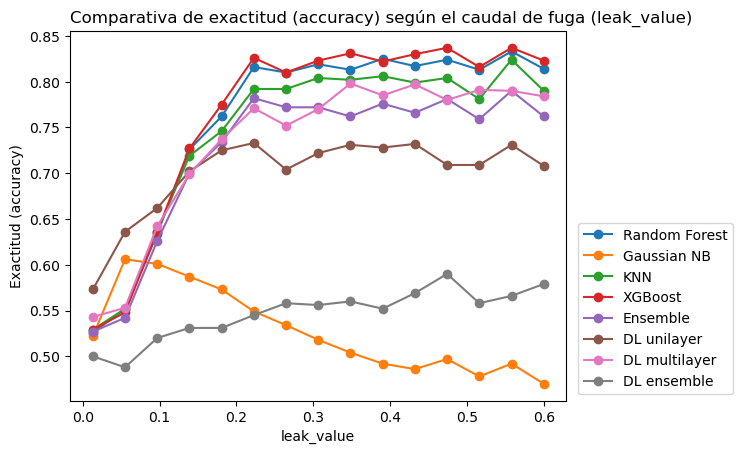

In [69]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['accuracy_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de exactitud (accuracy) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Exactitud (accuracy)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_accuracy.eps', format='eps')

plt.show()

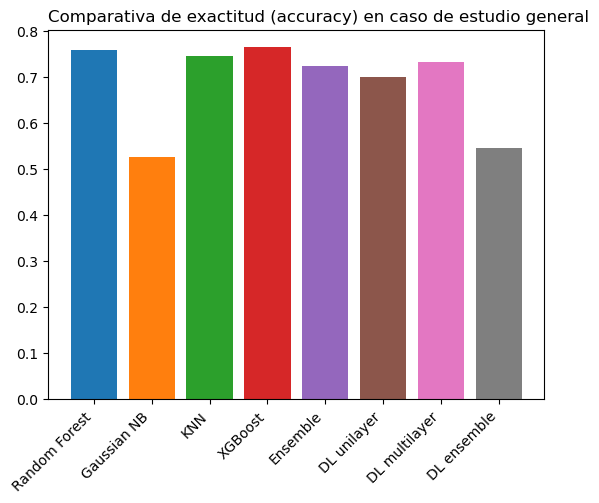

In [70]:
for (name, results) in display_list:
    plt.bar(name, results[0]['accuracy_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de exactitud (accuracy) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_accuracy_g.eps', format='eps')

plt.show()

#### Comparativa de días hasta detección de fuga 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


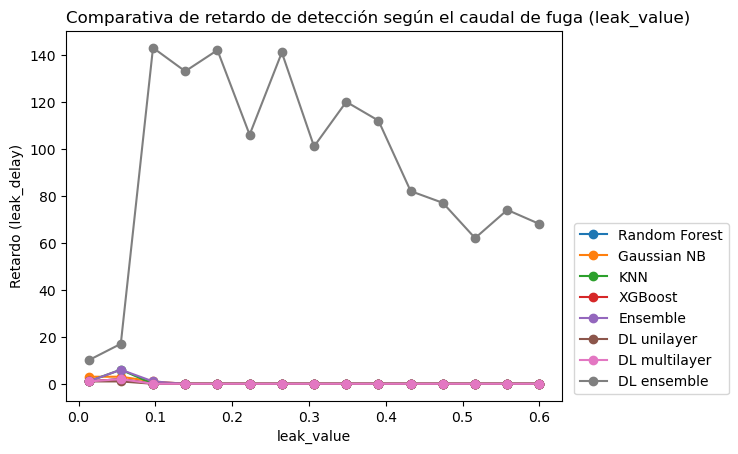

In [71]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['leak_delay'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de retardo de detección según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Retardo (leak_delay)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_leak_delay.eps', format='eps')

plt.show()

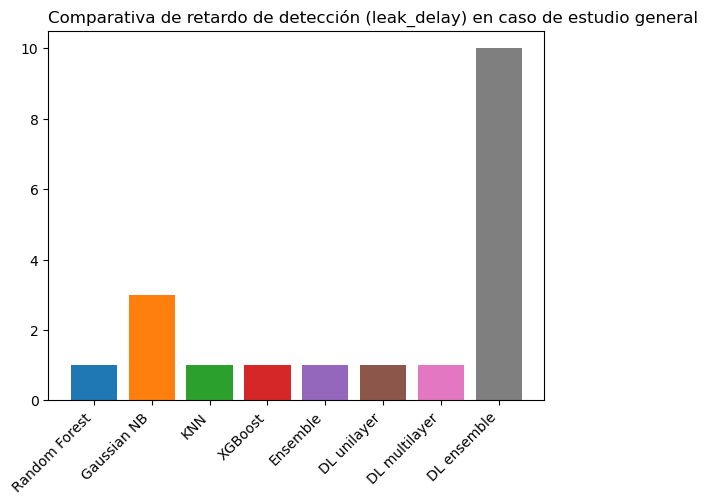

In [72]:
for (name, results) in display_list:
    plt.bar(name, results[0]['leak_delay'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de retardo de detección (leak_delay) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_leak_delay_g.eps', format='eps')

plt.show()